In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("DATA/survey_results_public.csv")

In [5]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [6]:
# Create df from 5 columns
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]


In [7]:
# Rename ConvertedComp Yearly to Salay 
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [8]:
#  Drop the Nan from Salary column
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [10]:
#  Drop Nan from rows 
df= df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [11]:
#  Keep the Employed full time Developers and drop the rest  
df = df[df["Employment"] == "Employed full-time"]


In [12]:
# Drop the Employment column 
df = df.drop("Employment" , axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [13]:
# Check the value count of the coulumn 'Country' .
df['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Gambia                                                     1
Guinea                                                     1
Monaco                                                     1
Dominica                                                   1
Djibouti                                                   1
Name: Country, Length: 166, dtype: int64

In [14]:
#  Make the 'Country' value_counts gathered under others so we could get more 
#  effective accuracy for training data.
def shorten_categories (categories , cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i]>= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map       
            

In [15]:
# Excute the shorten_categories value
country_map = shorten_categories(df.Country.value_counts(), 400)
# Change the df to df['Country'] and itterate threw the df 'country_map'.
df['Country'] = df['Country'].map(country_map)
#  check value _counts()
df.Country.value_counts()

other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

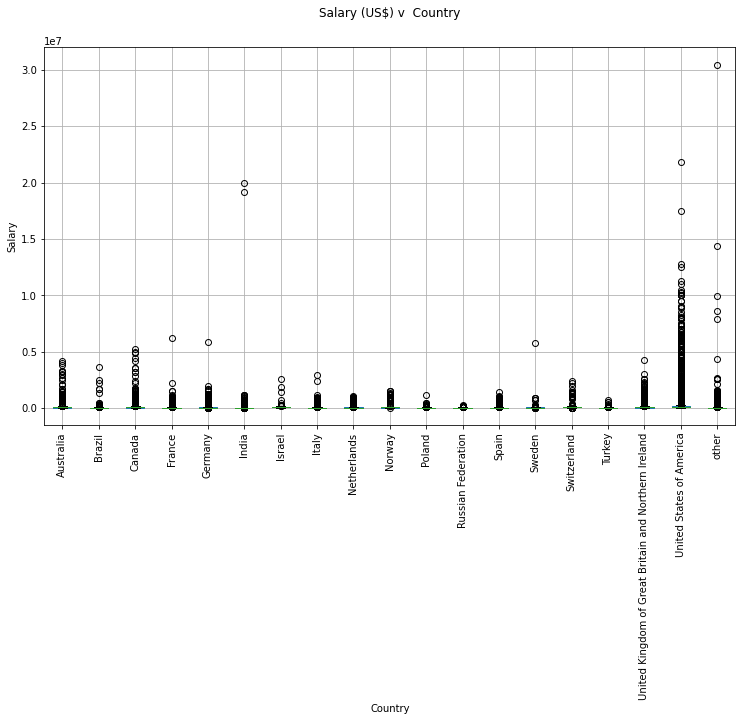

In [16]:
#  inspect the salary renage and for this we to plot the salary against the Country.
#  using box  plot , the green area is the medain area wgich has the most info we need .
#  The black dots is the outliers.
fig, ax = plt.subplots( 1,1 ,figsize = (12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v  Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


In [17]:
#  So we have to keep the only the green area , as we can see the green area does not reach more than for line ( $ 250 k ).
df = df[df['Salary'] <= 25000]
df = df[df['Salary'] >= 10000]
# we also need to drop the coumn 'other'.
df = df[df['Country'] != 'other']


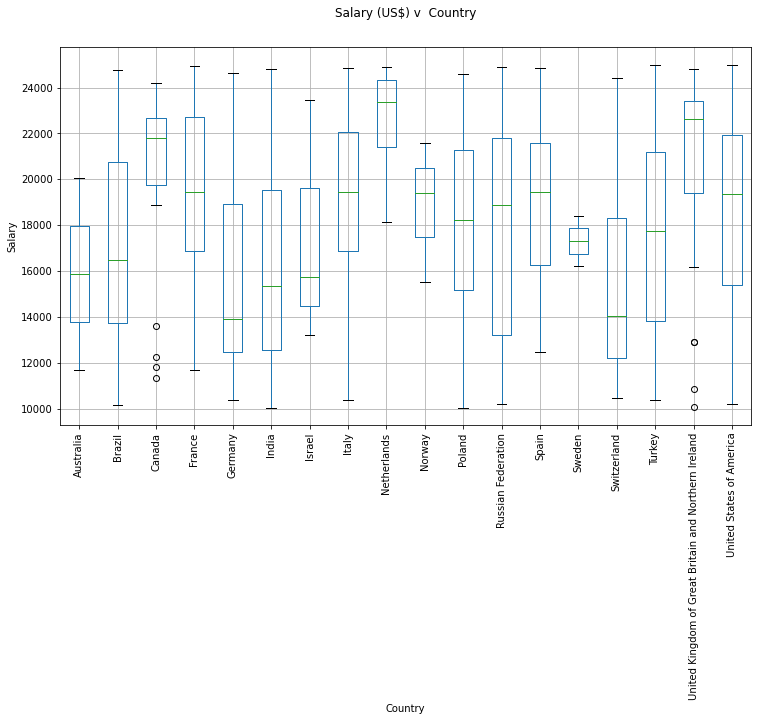

In [18]:
# use the same boxplot that we used before .
fig, ax = plt.subplots( 1,1 ,figsize = (12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v  Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
# We have to ispect the column 'YearsCodePro' to clean it .
df['YearsCodePro'].unique()

array(['2', '3', '10', '4', '12', 'Less than 1 year', '8', '1', '5', '7',
       '6', '13', '19', '14', '11', '22', '9', '15', '21', '20', '16',
       '31', '17', '18', '28', '23', '30', '27', '35', '25', '33', '39',
       '26', '24', '29', '37', '34'], dtype=object)

In [20]:
# We have to clean data by giving the less than one year 0.5 and convert it 
# to float if there is string value by making this function 
def clean_experiance (x):
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
# Transform the data and apply this function
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experiance)

In [21]:
# Doing a :imilar cleaning with the column 'EdLevel' , by inspecting it first .
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else'],
      dtype=object)

In [22]:
# We have to combine some answers Bachelor's , Master's, Pro degree by  creating a function.
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)


In [23]:
# Inspect the column 'EdLevel' after cleaning
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Post grad', 'Master’s degree',
       'Less than a Bachelors'], dtype=object)

In [24]:
# Transform column 'EdLevel' value to a number (0,1,2,..)so our model can anderstand 
from sklearn.preprocessing import LabelEncoder

# Create a label encoder education 
le_education = LabelEncoder()

# Fit and Transform label encoder to the model and 
# asign it back to the 'EdLevel' ( df ['EdLevel'])
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

# Inscpect the column for number results
df['EdLevel'].unique()

# Result order is not important the coder knows which number goes to which degree

array([0, 3, 2, 1])

In [25]:
# Create a label encoder education
le_country = LabelEncoder()

# Fit and Transform label encoder to the model and 
# asign it back to the 'Country' ( df ['Country'])
df['Country'] = le_country.fit_transform(df['Country'])

# Inscpect the column for number results
df['Country'].unique()

# Result order is not important the coder knows which number goes to which degree

array([15, 11,  7, 10, 16, 12,  5,  1,  4,  8,  3,  2, 17, 14,  6,  9, 13,
        0])

In [26]:
# We start Training our model
# To train our model we have to start split our  data in the feachure x 
# The rest of the columns ( Country , EdLevel, ..)
# we have to drop the column Salary
X = df.drop("Salary", axis=1)

#  And the label y ( is the Salary ) this is what we predict.
y = df["Salary"]

In [27]:
#  Import a LinearRegression ML from the sklearn library
#  Regression model , it means we do not predict a define catgeory like Cat or Dog
#  we need to prdict a number which can be from 0 to ...
from sklearn.linear_model import LinearRegression

#  Create a Model 
linear_reg = LinearRegression()

# For all the models in sklearn , we have to fit the data
linear_reg.fit(X, y.values)


LinearRegression()

In [28]:
#  Predict the Model
y_pred = linear_reg.predict(X)

Note : We normaly want to split data into ,training and testing and do the 
       fiting only on the training data( y ) but here for simplisity we do 
       this on the whole data( x, y.values)

In [29]:
# In order to evalute how good is our model performs so for the Regression 
# problems ,we usually have a look at the 
# ( mean_squared_error or mean_absolute_error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np

# calculate the Squareroot of (mean_squared_error(y, y.values)
error = np.sqrt(mean_squared_error(y, y_pred))

In [30]:
# check the error
error

# Result every time we predict the value , if it is in the range 
# from 10000 to 250 0000 , that is high error but in our case it is okay  

4190.670197696389

In [31]:
# Let us use another prediction model technique
from sklearn.tree import DecisionTreeRegressor

#  Create the Model 
dec_tree_reg = DecisionTreeRegressor(random_state=0)

# Fit the data
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [32]:
# Predcit the MOdel
y_pred = dec_tree_reg.predict(X)

In [33]:
# calculate the Squareroot of (mean_squared_error(y, y_pred)
error = np.sqrt(mean_squared_error(y, y_pred))
print ("${:,.02f}".format(error))

$3,576.51


In [34]:
# Let us try another model ( RandomForestRegression) will basically 
# combine multiple Decision Trees ( last Model ) into a forest 
from sklearn.ensemble import RandomForestRegressor

# Create the model
random_forest_reg = RandomForestRegressor(random_state=0)

# Fit the model 
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [35]:
# Preict the model
y_pred = random_forest_reg.predict(X)

In [36]:
# calculate the Squareroot of (mean_squared_error(X, y.values)
error = np.sqrt(mean_squared_error(y, y_pred))
print ("${:,.02f}".format(error))

$3,608.43


Note: Now we use GridSearchCV (or cross validation) which is 
      another technique to know which parameter in the models 
      that we did is the best , Example: the Decision tree model

In [37]:
from sklearn.model_selection import GridSearchCV

#  Define a set of different parameters Example: max_depth parameter 
#  try different values [None, 2, 4, 6, 8, 10, 12]
max_depth = [None, 2, 4, 6, 8, 10, 12]

#  create a dictionary , 
# { has to be the same name of the key word argument(DecisonTreeRegressor)}
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)

# create a grid searchcv and use a negation_mean_squared_error with the Grid Search
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')

# fit the Grid Search
gs.fit(X, y.values)

# Result will loop over every parameter and get the best prameter for us 

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [38]:
#  Get the best estimator
regressor = gs.best_estimator_

#  Fit the regressor
regressor.fit(X,y.values)

# predict the regressor
y_pred = regressor.predict(X)

# calculate the squared root of the model(regressor)
error = np.sqrt(mean_squared_error(y, y_pred))

print("${:.02f}".format(error))

$3979.98


In [39]:
# Print the data frame
X

,Country,EdLevel,YearsCodePro
16,15,0,2.0
33,15,0,2.0
58,11,3,3.0
114,7,2,2.0
182,10,0,3.0
...,...,...,...
83229,1,2,6.0
83289,7,2,0.5
83347,1,3,0.5
83416,17,0,10.0


In [40]:
# Country, EdLevel , YearsCodePro
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [41]:
# We apply the encoder( transform code) to the Country, EdLevel columns to make it float
X[:, 0] = le_country.fit_transform(X[:,0])
X[:, 1] = le_education.fit_transform(X[:,1])
X = X.astype(float)
X

array([[ 0.,  0., 15.]])

In [42]:
# Put the array values in our regressor and predict the Salary 
y_pred = regressor.predict(X)
y_pred

array([18755.33742331])

Note: Now we have to save this data ( results) in our APP

In [43]:
import pickle

In [44]:
# We need tomake a dictionary ans save in it 
# {"model": regressor,"le_country": le_country, "le_education":le_education }
data = {"model": regressor,"le_country": le_country, "le_education":le_education }

#  open and save  a pickle file using this "write binary mode (wb)" --Important --
#     we dump the data in file
with open ("save_steps.pkl", 'wb') as file:
    pickle.dump(data, file)



In [47]:
#  we can check it by loading it in "read binary mode"
with open ("save_steps.pkl", 'rb') as file:
     data = pickle.load(file)
        
# we access the lable encode by the key 
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']


In [48]:
#  Run the prediction with our loaded model to check the exact number 
y_pred = regressor_loaded.predict(X)
y_pred

array([18755.33742331])

In [ ]:
# Now we have our pipeline
# Then we have to convert the code from jupyter nobook to our app
# Let's create Three new files : app.py , predict_page.py, explore_page.py .
# First : we work on (visual code) predict_page.py ( import streamlite , import pickle, ...)
# Second : we need to open the app from the (app.py) file 